In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

import torch
import torch.nn as nn
import torch.nn.functional as F


import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
train = pd.read_csv("/home/hasan/Data Set/Kannada-MNIST/train.csv")
test = pd.read_csv("/home/hasan/Data Set/Kannada-MNIST/test.csv")
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(3)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature and Label data

In [5]:
X = train.drop('label', axis=1)
test = test
y = train.label

# Data Normalize and Standardize

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42, stratify=y)

In [7]:
# Data Normalize
scaler = MinMaxScaler()
normalized_xtrain = scaler.fit_transform(x_train)
normalized_xtest = scaler.fit_transform(x_test)


# Data Standardize
std = StandardScaler()
standardized_xtrain = scaler.fit_transform(normalized_xtrain)
standardized_xtest = scaler.fit_transform(normalized_xtest)


# Using Machine Learning Algorithms

### Random Forst Classifier

In [8]:
rfc = RandomForestClassifier() 
rfc.fit(standardized_xtrain, y_train) 

RandomForestClassifier()

In [9]:
# Predicting with test data
rfc_predicted = rfc.predict(standardized_xtest)

In [10]:
# Classification Report
print(classification_report(y_test, rfc_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1800
           1       0.97      0.99      0.98      1800
           2       1.00      0.99      0.99      1800
           3       0.96      0.97      0.97      1800
           4       0.97      0.99      0.98      1800
           5       0.98      0.99      0.99      1800
           6       0.96      0.98      0.97      1800
           7       0.98      0.95      0.96      1800
           8       0.99      0.99      0.99      1800
           9       1.00      0.97      0.98      1800

    accuracy                           0.98     18000
   macro avg       0.98      0.98      0.98     18000
weighted avg       0.98      0.98      0.98     18000



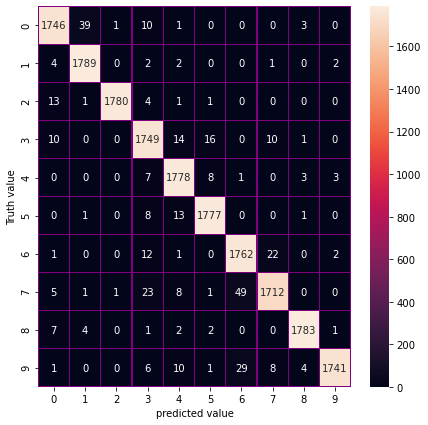

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, rfc_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

### Using Gradient Boosting Classifier

In [14]:
gbc = GradientBoostingClassifier()
gbc.fit(standardized_xtrain, y_train)

GradientBoostingClassifier()

In [15]:
gbc_train_score = gbc.score(x_train, y_train)
gbc_train_score

0.9645238095238096

In [16]:
gbc_predicted = gbc.predict(x_test)

In [17]:
print(classification_report(y_test, gbc_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1800
           1       0.98      0.96      0.97      1800
           2       0.99      0.99      0.99      1800
           3       0.90      0.97      0.93      1800
           4       0.96      0.97      0.96      1800
           5       0.96      0.97      0.97      1800
           6       0.95      0.96      0.95      1800
           7       0.95      0.88      0.92      1800
           8       0.99      0.96      0.97      1800
           9       0.99      0.95      0.97      1800

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



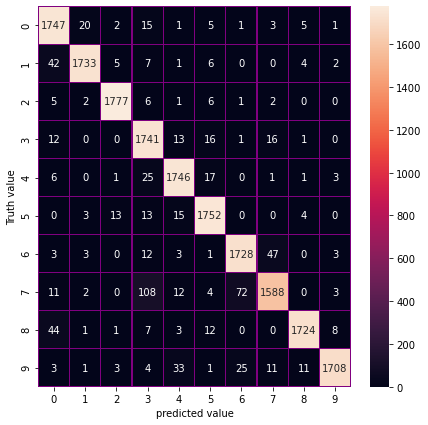

In [18]:
cm = confusion_matrix(y_test, gbc_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

## AUC-ROC for Multi-Class Classification

In [19]:
mc_rfc = OneVsRestClassifier(RandomForestClassifier())
mc_rfc.fit(standardized_xtrain, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [20]:
mc_rfc_predicted = mc_rfc.predict(x_test)
mc_rfc_predicted_prob = mc_rfc.predict_proba(x_test)

In [21]:
fpr = {}
tpr = {}
thresh = {}
n_class = 10

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, mc_rfc_predicted_prob[:,i], pos_label=i)


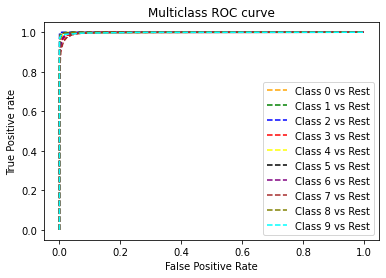

In [22]:
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--', color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--', color='black', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--', color='purple', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--', color='brown', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--', color='olive', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--', color='cyan', label='Class 9 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)

# Using Linear Model

In [3]:
X = train.drop('label', axis=1).values
y = train['label'].values

In [4]:
X = X.reshape(X.shape[0], 28, 28, 1)
y = to_categorical(y, 10) 
print("Shape of X is :{} Shape of y is :{}".format(X.shape, y.shape))

Shape of X is :(60000, 28, 28, 1) Shape of y is :(60000, 10)


In [5]:
mean = X.mean()
std = X.std()

def standardize(x):
    return (x-mean)/std


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


In [7]:
model1 = Sequential()
model1.add(Lambda(standardize, input_shape=(28, 28, 1)))
model1.add(Dense(64, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model1.add(Dropout(.2))
model1.add(Dense(128, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model1.add(Flatten())
model1.add(Dense(10, activation='sigmoid'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
dense (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 128)       8320      
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1003530   
Total params: 1,011,978
Trainable params: 1,011,978
Non-trainable params: 0
______________________________________________

In [9]:
model1.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model1.fit(x_train, y_train, 
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data = (x_test, y_test),  
                    verbose=2)

Epoch 1/10
30/30 - 90s - loss: 1.1188 - accuracy: 0.6604 - val_loss: 0.2516 - val_accuracy: 0.9209
Epoch 2/10
30/30 - 92s - loss: 0.1920 - accuracy: 0.9405 - val_loss: 0.1577 - val_accuracy: 0.9546
Epoch 3/10
30/30 - 88s - loss: 0.1414 - accuracy: 0.9583 - val_loss: 0.1229 - val_accuracy: 0.9657
Epoch 4/10
30/30 - 90s - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.1590 - val_accuracy: 0.9517
Epoch 5/10
30/30 - 94s - loss: 0.1098 - accuracy: 0.9660 - val_loss: 0.1232 - val_accuracy: 0.9643
Epoch 6/10
30/30 - 92s - loss: 0.1038 - accuracy: 0.9685 - val_loss: 0.1369 - val_accuracy: 0.9588
Epoch 7/10
30/30 - 91s - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.1222 - val_accuracy: 0.9651
Epoch 8/10
30/30 - 88s - loss: 0.0971 - accuracy: 0.9699 - val_loss: 0.1113 - val_accuracy: 0.9684
Epoch 9/10
30/30 - 90s - loss: 0.0889 - accuracy: 0.9722 - val_loss: 0.1149 - val_accuracy: 0.9683
Epoch 10/10
30/30 - 102s - loss: 0.0867 - accuracy: 0.9732 - val_loss: 0.1189 - val_accuracy: 0.9662


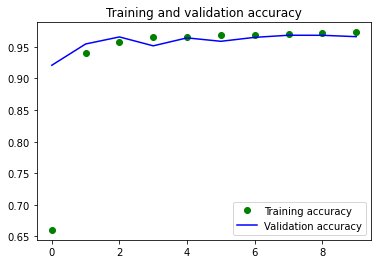

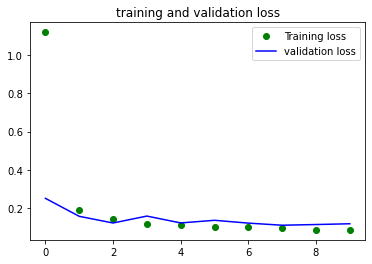

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [12]:
model1.evaluate(x_train, y_train)

1500/1500 [==============================] - 22s 15ms/step - loss: 0.0733 - accuracy: 0.9770


[0.0732770562171936, 0.9769791960716248]

In [13]:
# Prediciting with test data
predicted = model1.predict(x_test)
accuracy_score(y_test, predicted.round())

0.15866666666666668

In [14]:
# classification report
print(classification_report(predicted.round(), y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.99      0.49       395
           2       0.57      1.00      0.73       689
           3       0.00      1.00      0.00         3
           4       0.23      1.00      0.38       280
           5       0.07      1.00      0.13        81
           6       0.01      1.00      0.02        13
           7       0.08      0.96      0.15       100
           8       0.06      1.00      0.12        74
           9       0.23      1.00      0.37       275

   micro avg       0.16      1.00      0.27      1910
   macro avg       0.16      0.90      0.24      1910
weighted avg       0.35      1.00      0.49      1910
 samples avg       0.16      0.16      0.16      1910



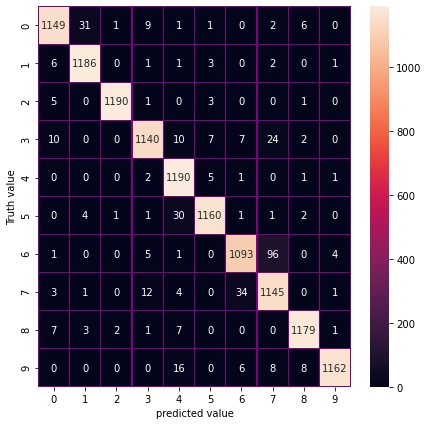

In [15]:
# confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1))
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

# Using PyTorch Linear Layer

In [10]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
print("Shape of X is :{} Shape of y is :{}".format(X.shape, y.shape))

Shape of X is :(60000, 784) Shape of y is :(60000,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(42000, 784) (18000, 784) (42000,) (18000,)


In [12]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [13]:
class Model(nn.Module):
    def __init__(self, input_features=784, hidden_layer1=392, hidden_layer2=196, output_features=10):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [14]:
Model = Model()

In [15]:
#optimizer = torch.optim.SGD(Model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(Model.parameters(), lr=0.001)
#loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()


In [16]:
epochs = 50
train_losses = []
valid_losses = []
train_correct = []
valid_correct = []

for epoch in range(epochs):
    out1 = Model.forward(x_train)
    train_loss = criterion(out1, y_train)
    train_losses.append(train_loss)
    
    out2 = Model.forward(x_test)
    valid_loss = criterion(out2, y_test)
    valid_losses.append(valid_loss)

    optimizer.zero_grad()
    train_loss.backward()
    valid_loss.backward()
    optimizer.step()
    
    print(f'Epoch: {epoch:2}  Train_loss: {train_loss.item():10.8f}  Valid_loss:{valid_loss.item():10.8f} ')


Epoch:  0  Train_loss: 10.35873985  Valid_loss:10.38581848 
Epoch:  1  Train_loss: 8.83752155  Valid_loss:8.85624886 
Epoch:  2  Train_loss: 5.87732744  Valid_loss:5.87817144 
Epoch:  3  Train_loss: 5.15601778  Valid_loss:5.14671278 
Epoch:  4  Train_loss: 3.91368294  Valid_loss:3.90156341 
Epoch:  5  Train_loss: 2.48149228  Valid_loss:2.46873331 
Epoch:  6  Train_loss: 1.45247006  Valid_loss:1.43491840 
Epoch:  7  Train_loss: 0.92974257  Valid_loss:0.91035092 
Epoch:  8  Train_loss: 0.76970118  Valid_loss:0.75386757 
Epoch:  9  Train_loss: 0.76017684  Valid_loss:0.75560105 
Epoch: 10  Train_loss: 0.76478755  Valid_loss:0.76738733 
Epoch: 11  Train_loss: 0.68793297  Valid_loss:0.68816787 
Epoch: 12  Train_loss: 0.55021018  Valid_loss:0.54386574 
Epoch: 13  Train_loss: 0.43577012  Valid_loss:0.42388678 
Epoch: 14  Train_loss: 0.38528883  Valid_loss:0.37282857 
Epoch: 15  Train_loss: 0.36726454  Valid_loss:0.35588947 
Epoch: 16  Train_loss: 0.34913763  Valid_loss:0.33757773 
Epoch: 17  T

Text(0.5, 0, 'epoch')

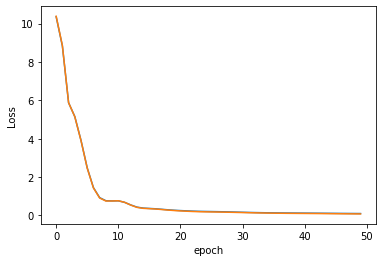

In [17]:
plt.plot(range(epochs), train_losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

plt.plot(range(epochs), valid_losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

In [18]:
predicted = Model(x_test)
_, predict_y = torch.max(predicted, 1)

In [19]:
print('prediction accuracy :', accuracy_score(y_test.data, predict_y.data))

prediction accuracy : 0.9761666666666666


In [20]:
# Classification Report
print(classification_report(y_test.data, predict_y.data))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1800
           1       0.96      0.99      0.98      1800
           2       1.00      0.99      1.00      1800
           3       0.97      0.97      0.97      1800
           4       0.97      0.98      0.98      1800
           5       0.98      0.98      0.98      1800
           6       0.96      0.97      0.97      1800
           7       0.96      0.96      0.96      1800
           8       0.99      0.99      0.99      1800
           9       0.99      0.97      0.98      1800

    accuracy                           0.98     18000
   macro avg       0.98      0.98      0.98     18000
weighted avg       0.98      0.98      0.98     18000



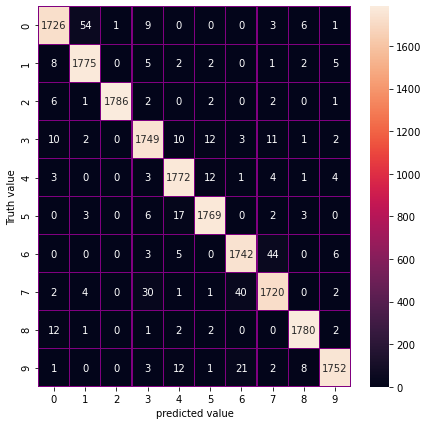

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, predict_y.data)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()